## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [2]:
# read the dataset
data = pd.read_csv('./datasets/Datains - Marcella - Price Monitoring TP-Link_TP-Link Price Monitoring_Table.csv')

# get a glimpse of the Dataset
data.head()

C:\Users\sitia\AppData\Local\Temp\ipykernel_39388\2838975155.py:2: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./datasets/Datains - Marcella - Price Monitoring TP-Link_TP-Link Price Monitoring_Table.csv')


,Date,Last Crawling,SKU Name,Product Name,Url Product,Seller,Merchant,Stock,Item Condition,Filter,Flag,Bottom Price,Original Price,Discount,Selling Price,Discrepancy,Sales Quantity,Sales Revenue
0,"Oct 22, 2022","Oct 22, 2022",TL WR840N,TP-Link TL-WR840N 2 Antenna 300Mbps Wireless N...,https://tokopedia.com/ccplace/tp-link-tl-wr840...,ccplace shop,tokopedia,In Stock,baru,Above,Please Check,155000,231000,0,231000,0.014903,0,0
1,"Oct 22, 2022","Oct 22, 2022",TL WR840N,Promo TP-LINK TL-WR840N Wireless Router 300Mbp...,https://tokopedia.com/gilsaashopp/promo-tp-lin...,gilsaa_shopp,tokopedia,In Stock,baru,Above,Please Check,155000,218800,0,218800,0.014116,0,0
2,"Oct 22, 2022","Oct 22, 2022",TL WR840N,Tp-Link TL-WR840N 300Mbps Wireless N Speed Rou...,https://tokopedia.com/ccwinta/tp-link-tl-wr840...,ccwinta shop,tokopedia,In Stock,baru,Above,Please Check,155000,227000,0,227000,0.014645,0,0
3,"Oct 22, 2022","Oct 22, 2022",TL WR840N,JARINGAN TP-LINK TL-WR 840N TL-WR840N 300MBps ...,https://tokopedia.com/belsa/jaringan-tp-link-t...,BELSA_SHOP,tokopedia,In Stock,baru,Above,Please Check,155000,263000,0,263000,0.016968,0,0
4,"Oct 22, 2022","Oct 22, 2022",TL WR840N,TPLink TL-WR840N Router Wireless WiFi 300Mbps ...,https://tokopedia.com/ccwinta/tplink-tl-wr840n...,ccwinta shop,tokopedia,In Stock,baru,Above,Please Check,155000,236000,0,236000,0.015226,0,0


## Exploring the Dataset

In [3]:
# get numerical values of the dataset
data.describe()

,Bottom Price,Selling Price,Discrepancy,Sales Quantity,Sales Revenue
count,32772.0,3.277200e+04,32772.000000,32772.000000,3.277200e+04
mean,155000.0,2.682624e+05,0.017166,13.306603,2.082037e+06
std,0.0,3.857990e+05,0.024959,353.210553,5.482303e+07
min,155000.0,2.500000e+04,0.000000,0.000000,0.000000e+00
25%,155000.0,2.140000e+05,0.013806,0.000000,0.000000e+00
50%,155000.0,2.420000e+05,0.015613,0.000000,0.000000e+00
75%,155000.0,2.870000e+05,0.018516,0.000000,0.000000e+00
max,155000.0,5.550000e+07,3.580645,33740.000000,5.229700e+09


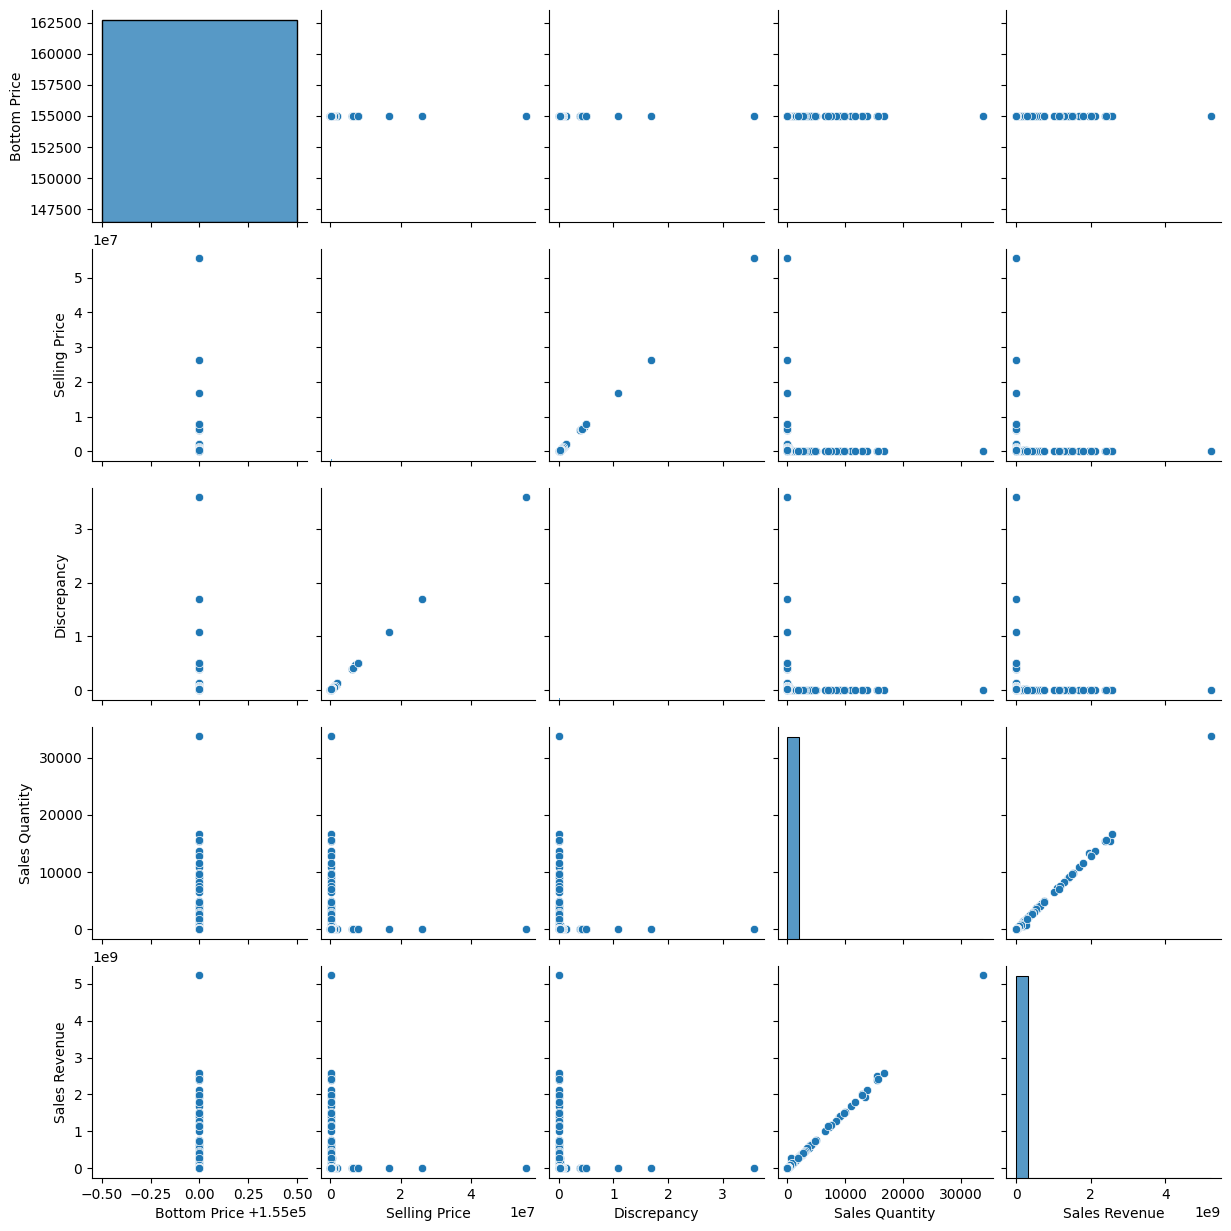

In [4]:
# get paired plots pattern
sns.pairplot(data)

The closest pattern to the pattern of a regression line for predicting the selling price is the third rows of the second column. Which features the Discrepancy as the independent variable

In [14]:
# Clean up the original price data
discrepancy = data["Discrepancy"]
discrepancy = pd.to_numeric(discrepancy, errors='coerce')
discrepancy = discrepancy.fillna(0)

# Clean up the selling price data
selling_price = data["Selling Price"]
selling_price = pd.to_numeric(selling_price, errors='coerce')
selling_price = selling_price.fillna(0)

In [15]:
X = discrepancy.values
y = selling_price.values

mean_X = np.mean(X)
mean_y = np.mean(y)

To prove the seaborn's pairplot, we drew the scatterplot using matplotlib's pyplot

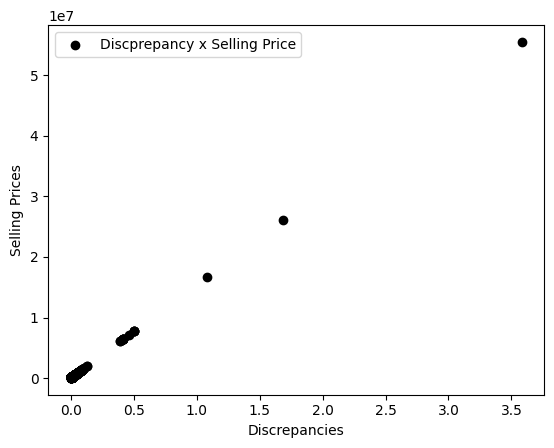

In [30]:
plt.scatter(X, y, color="black", label="Discprepancy x Selling Price")
plt.xlabel("Discrepancies")
plt.ylabel("Selling Prices")
plt.legend()
plt.show()

## Processing the Data
The linear regression's slope follows the following formula:

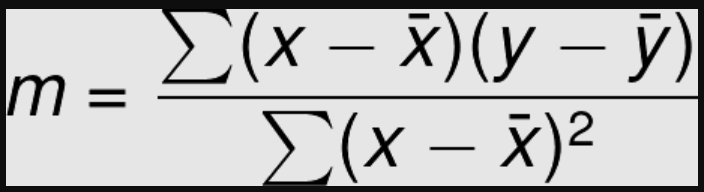

- m = slope
- X = dependent variable
- y = independent variable

In [27]:
numerator = 0
denominator = 0

for i in range(len(X)):
    numerator += (X[i] - mean_X) * (y[i] - mean_y)
    denominator += (X[i] - mean_X) ** 2

m = numerator / denominator

To predict the target, we use the following formula:

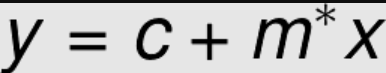

- y = target
- c = intercept, shows the point where the estimated regression line crosses the 𝑦 axis
- m = slope
- x = input data point

In [33]:
c = mean_y - (m * mean_X) # intercept
line = c + m * X

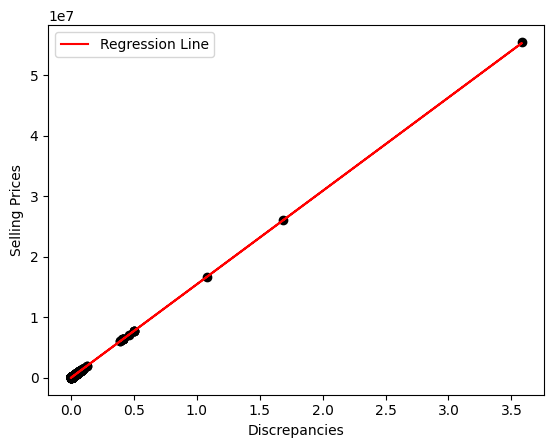

In [29]:
plt.scatter(X, y, color="black")
plt.plot(X, line, color="red", label="Regression Line")
plt.xlabel("Discrepancies")
plt.ylabel("Selling Prices")
plt.legend()
plt.show()

Make a function to make a prediction from the `discrepancy`

In [19]:
def predict(x):
    return c + m * x

In [20]:
predict(X[1]) # predicting a value

221168.7553294092

## Evaluating the model
We can use the following formula to calculate the R-squared value and evaluate our model with it

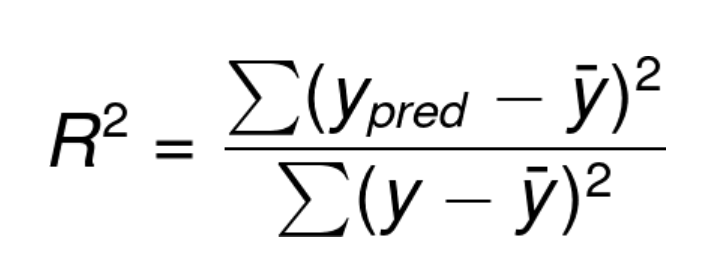

In [34]:
ss_t = 0 # total sum of squares
ss_r = 0 # total sum of square of residuals

for i in range(len(X)):
  y_pred = c + m * X[i]
  ss_t += (y[i] - mean_y) ** 2
  ss_r += (y[i] - y_pred) ** 2

r2 = 1 - (ss_r / ss_t) # calculate the R-squared value

print(f"R-squared value: {r2}")

R-squared value: 0.997771667613444
